In [1]:
from google.colab import files
uploaded=files.upload()

Saving DATA.csv to DATA.csv


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('DATA.csv')
data.head()

CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   
2   1001020300  Alabama  Autauga      2968  1364   1604       0.0   74.5   
3   1001020400  Alabama  Autauga      4423  2172   2251      10.5   82.8   
4   1001020500  Alabama  Autauga     10763  4922   5841       0.7   68.5   

   Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    7.7     0.3  ...   0.5          2.3         2.1         25.0       943   
1   53.3     0.0  ...   0.0          0.7         0.0         23.4       753   
2   18.6     0.5  ...   0.0          0.0         2.5         19.6      1373   
3    3.7     1.6  ...   0.0          2.6         1.6         25.3      1782   
4   24.8     0.0  ...   0.0          0.6         0.9         24.8      5037   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         77.1        18.3           4.6         0.0           5.4  
1         77.0        16.9           6.1         0.0          13.3  
2         64.1        23.6          12.3         0.0           6.2  
3         75.7        21.2           3.1         0.0          10.8  
4         67.1        27.6           5.3         0.0           4.2  

[5 rows x 37 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

In [5]:
d=data.isnull().sum()
d

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

In [6]:
data.dtypes

CensusTract          int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap       float64
IncomePerCapErr    float64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

STEP 1: IMPORT ALL THE NECESSARY LIBRARIES

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA


DATA PREPROCESSING

STEP 1:REMOVING THE NULL VALUES

In [8]:
categorical_columns = data.select_dtypes(include="object").columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

In [9]:
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [10]:
d=data.isnull().sum()
d

CensusTract        0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

STEP 2 REMOVING THE VALUES 0

In [11]:
zeros = (data == 0).sum()
print("Zero values:\n\n",zeros)

Zero values:

 CensusTract            0
State                  0
County                 0
TotalPop             690
Men                  707
Women                740
Hispanic            2427
White                641
Black               8161
Native             42657
Asian              15974
Pacific            64365
Citizen              691
Income                 0
IncomeErr              0
IncomePerCap           0
IncomePerCapErr        0
Poverty              163
ChildPoverty        4408
Professional          76
Service              110
Office                88
Construction        1023
Production           432
Drive                 54
Carpool              515
Transit            22251
Walk               14243
OtherTransp        14353
WorkAtHome          3891
MeanCommute            0
Employed             807
PrivateWork           20
PublicWork           156
SelfEmployed         961
FamilyWork         56595
Unemployment         265
dtype: int64


OBSERVATION ONE: VALUE 0 IS ACCEPTABLE IN ALL FEATURES EXCEPT THE 'TotalPop' WHICH CANNOT BE ZERO AND IT WOULD MEDDLE WITH RESULTS IN THE MODEL

In [12]:
data.drop(data[data.TotalPop == 0].index, inplace=True)
zeros = (data == 0).sum()
print("Zero values:\n\n",zeros)

Zero values:

 CensusTract            0
State                  0
County                 0
TotalPop               0
Men                   17
Women                 50
Hispanic            2427
White                641
Black               8161
Native             42657
Asian              15974
Pacific            64365
Citizen                1
Income                 0
IncomeErr              0
IncomePerCap           0
IncomePerCapErr        0
Poverty              163
ChildPoverty        4408
Professional          76
Service              110
Office                88
Construction        1023
Production           432
Drive                 54
Carpool              515
Transit            22251
Walk               14243
OtherTransp        14353
WorkAtHome          3891
MeanCommute            0
Employed             117
PrivateWork           20
PublicWork           156
SelfEmployed         961
FamilyWork         56595
Unemployment         265
dtype: int64


DATA ANALYSIS

In [13]:
for column in categorical_columns:
    column_stats = data[column].value_counts().reset_index()
    column_stats.columns = [column, "Count"]
    print("\nSummary statistics for", column, ":\n", column_stats)


Summary statistics for State :
                    State  Count
0             California   8012
1                  Texas   5227
2               New York   4857
3                Florida   4172
4           Pennsylvania   3202
5               Illinois   3115
6                   Ohio   2941
7               Michigan   2752
8         North Carolina   2171
9             New Jersey   2002
10               Georgia   1957
11              Virginia   1879
12               Arizona   1520
13               Indiana   1505
14             Tennessee   1483
15         Massachusetts   1464
16            Washington   1445
17             Wisconsin   1392
18              Maryland   1389
19              Missouri   1388
20             Minnesota   1334
21              Colorado   1242
22               Alabama   1176
23             Louisiana   1128
24              Kentucky   1109
25        South Carolina   1092
26              Oklahoma   1045
27           Puerto Rico    887
28           Connecticut    828
29     

In [14]:
def drop_outliers(df, feature, threshold=3.5):
    z_scores = zscore(df[feature])  # calculate z-scores
    outliers = df[np.abs(z_scores) > threshold]  # identify outliers
    df.drop(outliers.index, inplace=True)  # drop outliers from DataFrame
    return len(outliers)  # return the number of dropped outliers


<ipython-input-15-297851290d4c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-15-297851290d4c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-15-297851290d4c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-15-297851290d4c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-15-297851290d4c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

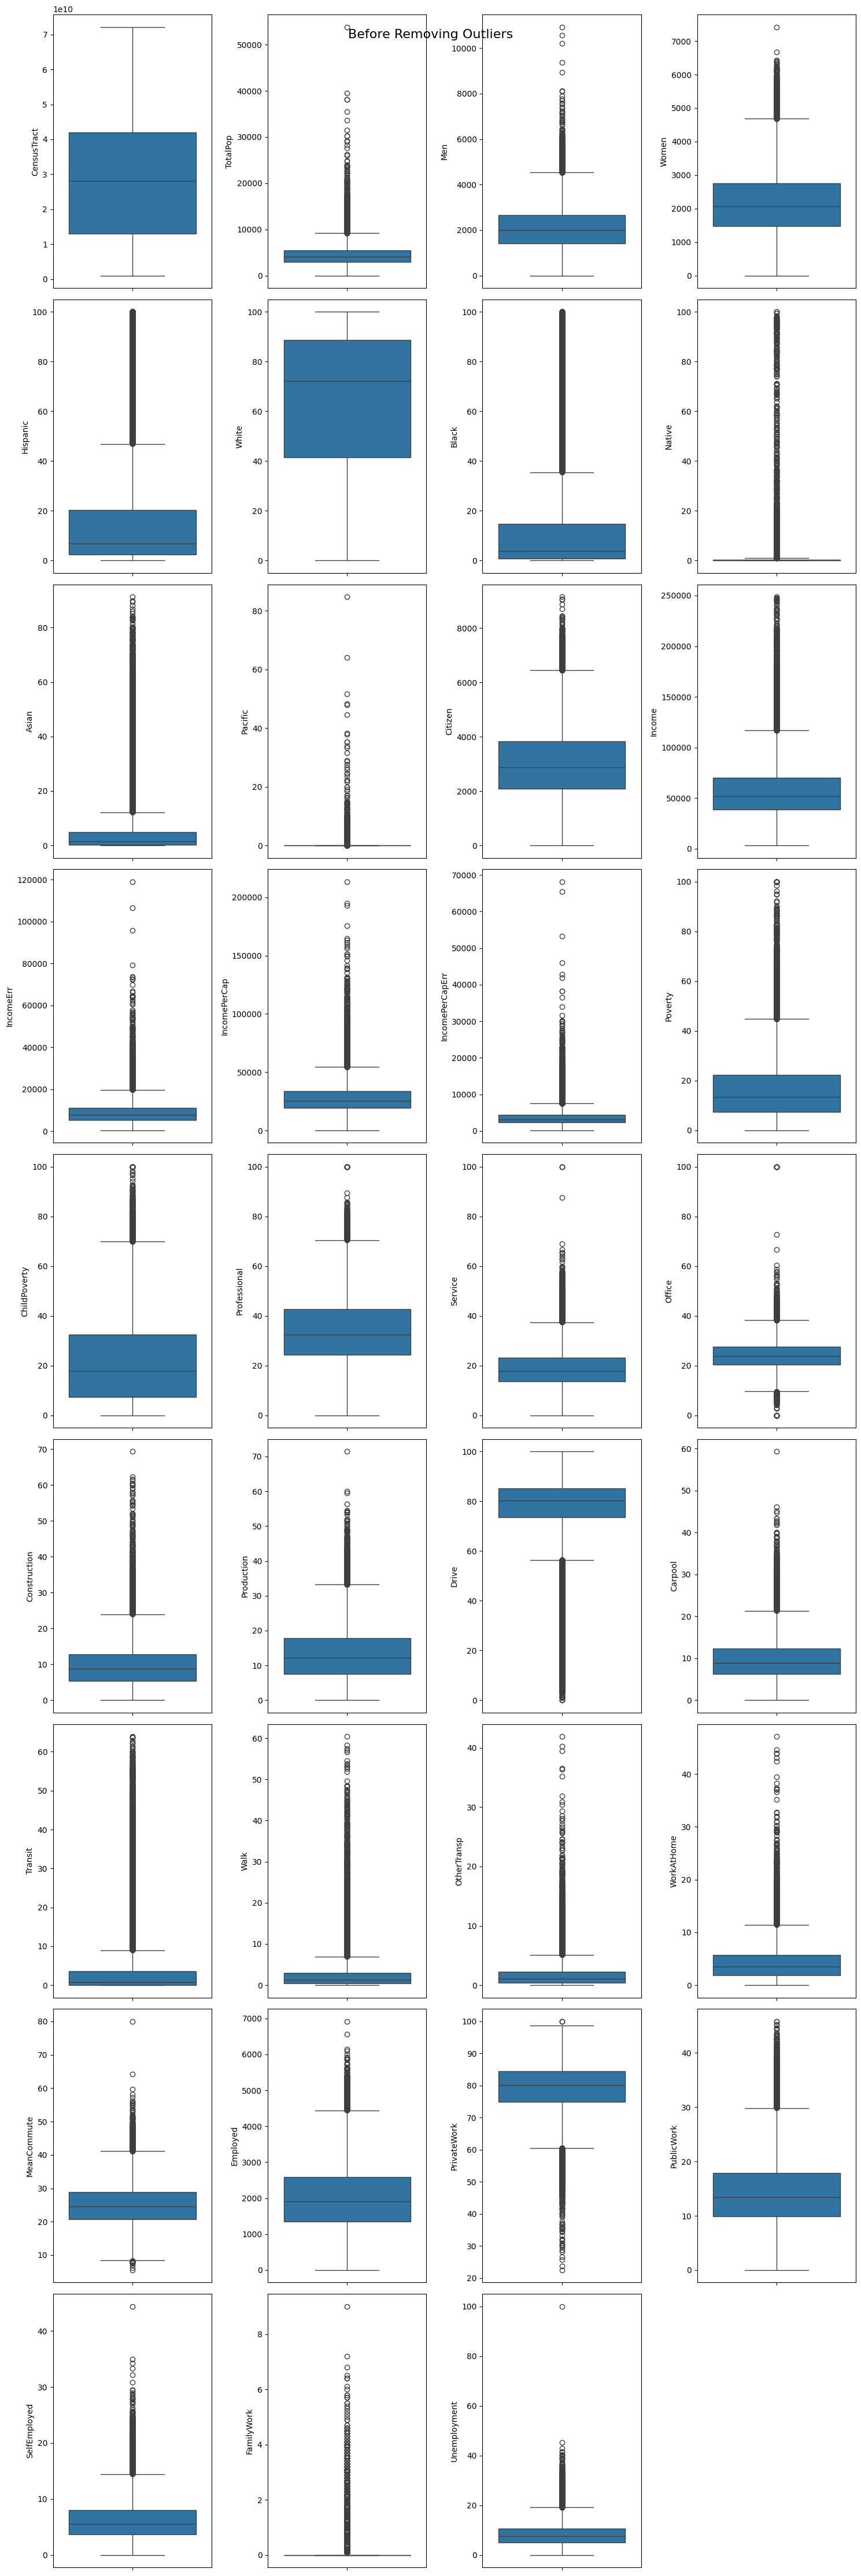

In [15]:
num_subplots_per_row = 4
num_rows = (len(numerical_columns) + num_subplots_per_row - 1) // num_subplots_per_row
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()
total_outliers = 0
outliers_by_column = {}
for i, feature in enumerate(numerical_columns):
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row
    ax = axes[i]
    sns.boxplot(data[feature], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    num_outliers = drop_outliers(data, feature)
    outliers_by_column[feature] = num_outliers
    total_outliers += num_outliers
if len(numerical_columns) % num_subplots_per_row != 0:
      for i in range(len(numerical_columns), num_rows * num_subplots_per_row):
        axes[i].axis('off')
fig.suptitle("Before Removing Outliers", fontsize=16)
plt.tight_layout()
plt.show()



<ipython-input-16-cf6f37c1ca43>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-16-cf6f37c1ca43>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-16-cf6f37c1ca43>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-16-cf6f37c1ca43>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-16-cf6f37c1ca43>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

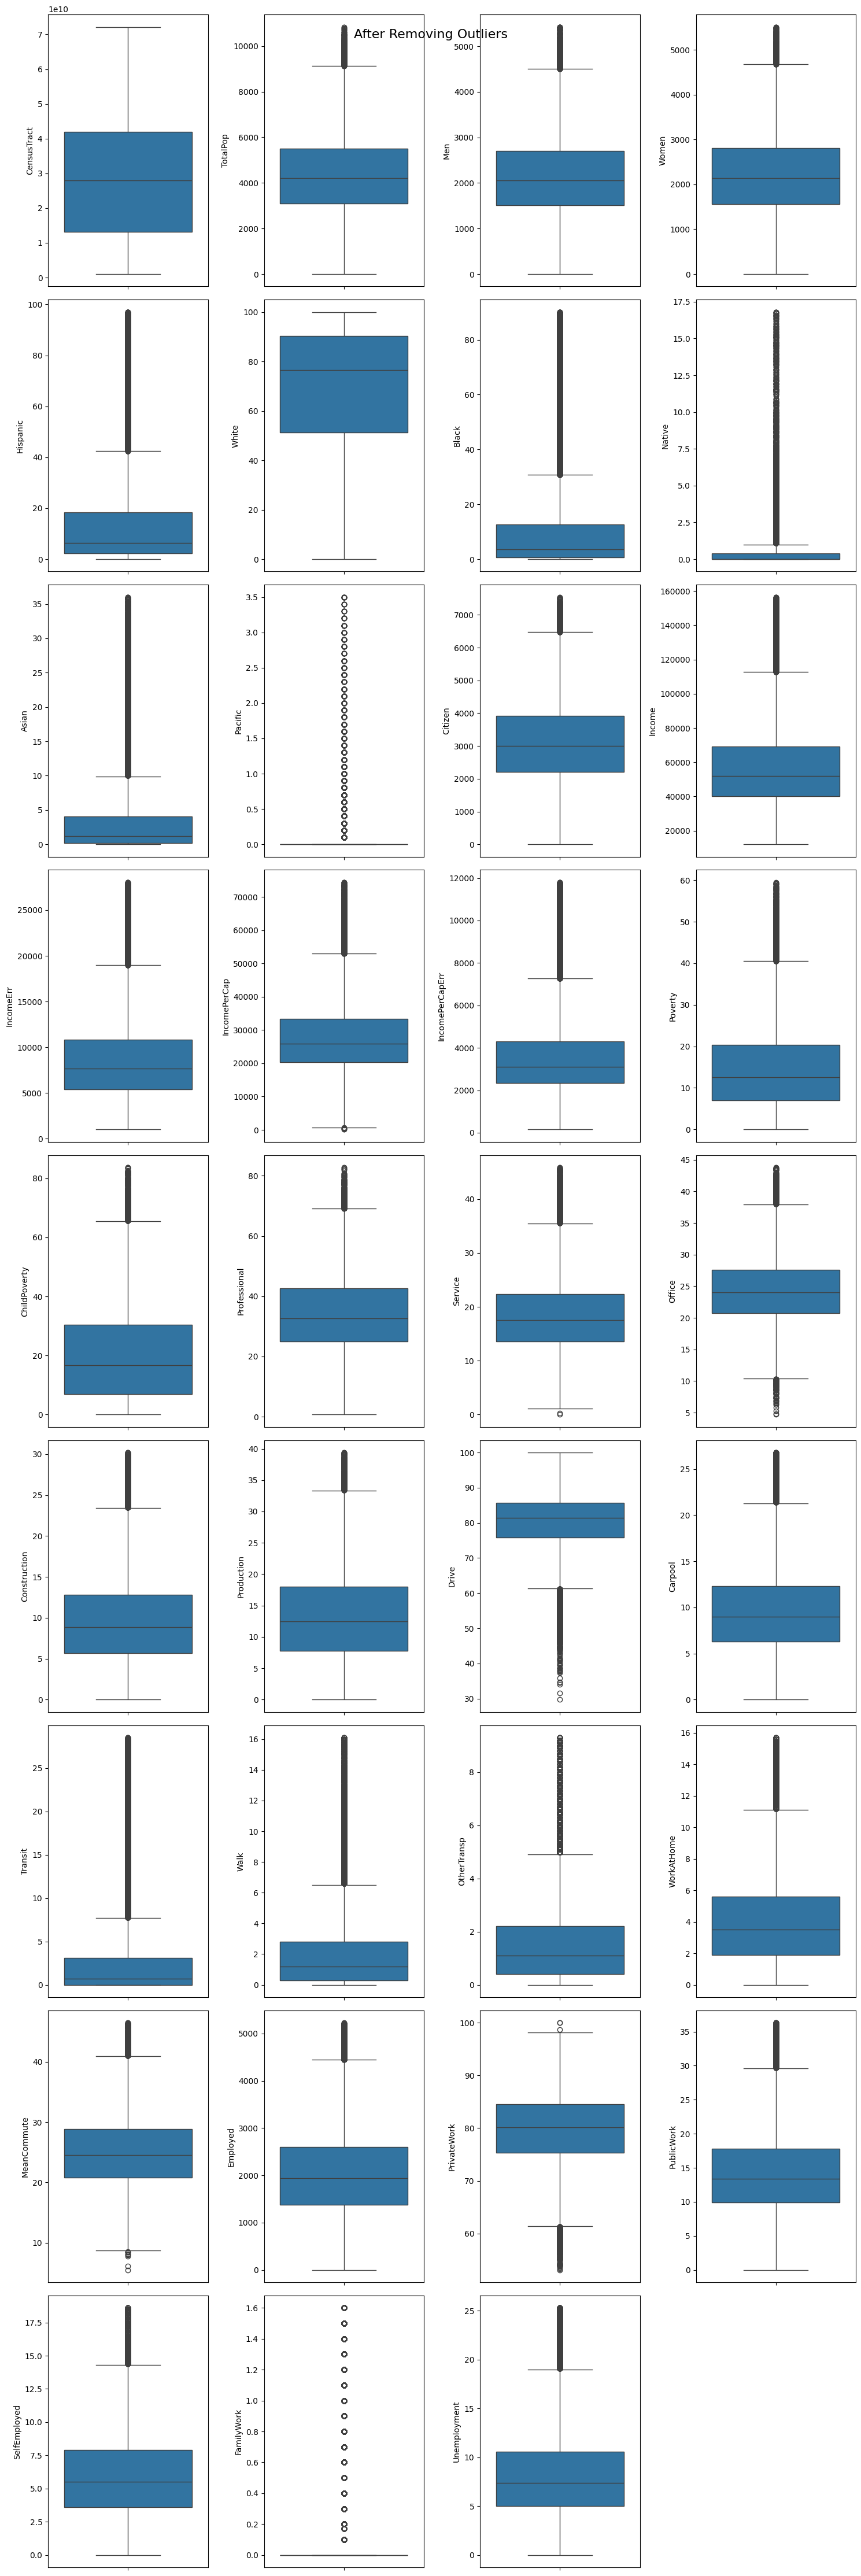

In [16]:
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, feature in enumerate(numerical_columns):
    row = i // num_subplots_per_row
    col = i % num_subplots_per_row
    ax = axes[i]
    sns.boxplot(data[feature], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
if len(numerical_columns) % num_subplots_per_row != 0:
    for i in range(len(numerical_columns), num_rows * num_subplots_per_row):
        axes[i].axis('off')
fig.suptitle("After Removing Outliers", fontsize=16)
plt.tight_layout()
plt.show()

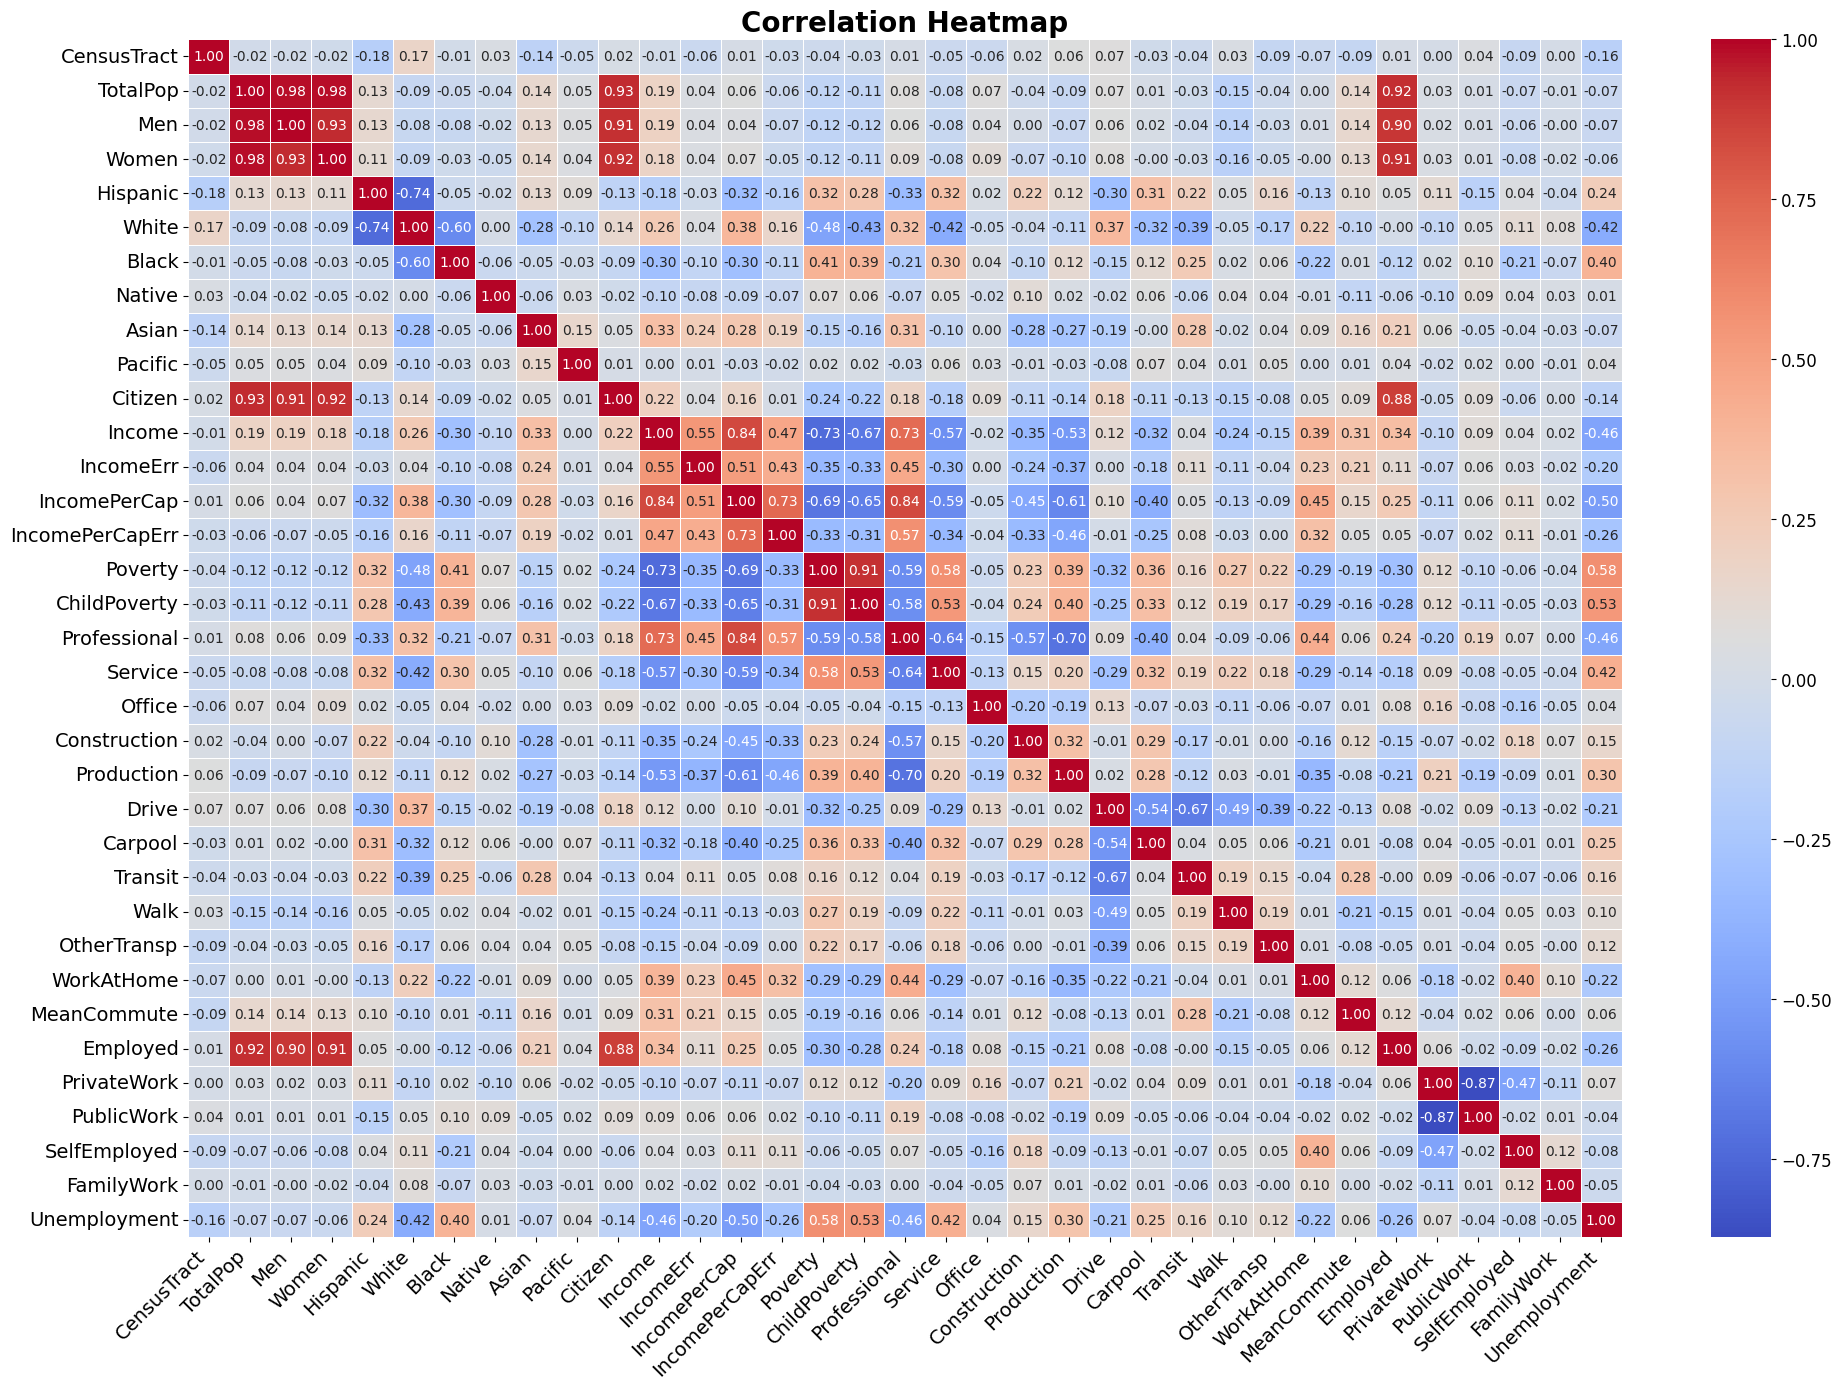

In [17]:
correlation_matrix =data[numerical_columns].corr()
plt.figure(figsize=(20, 14))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14)
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.show()

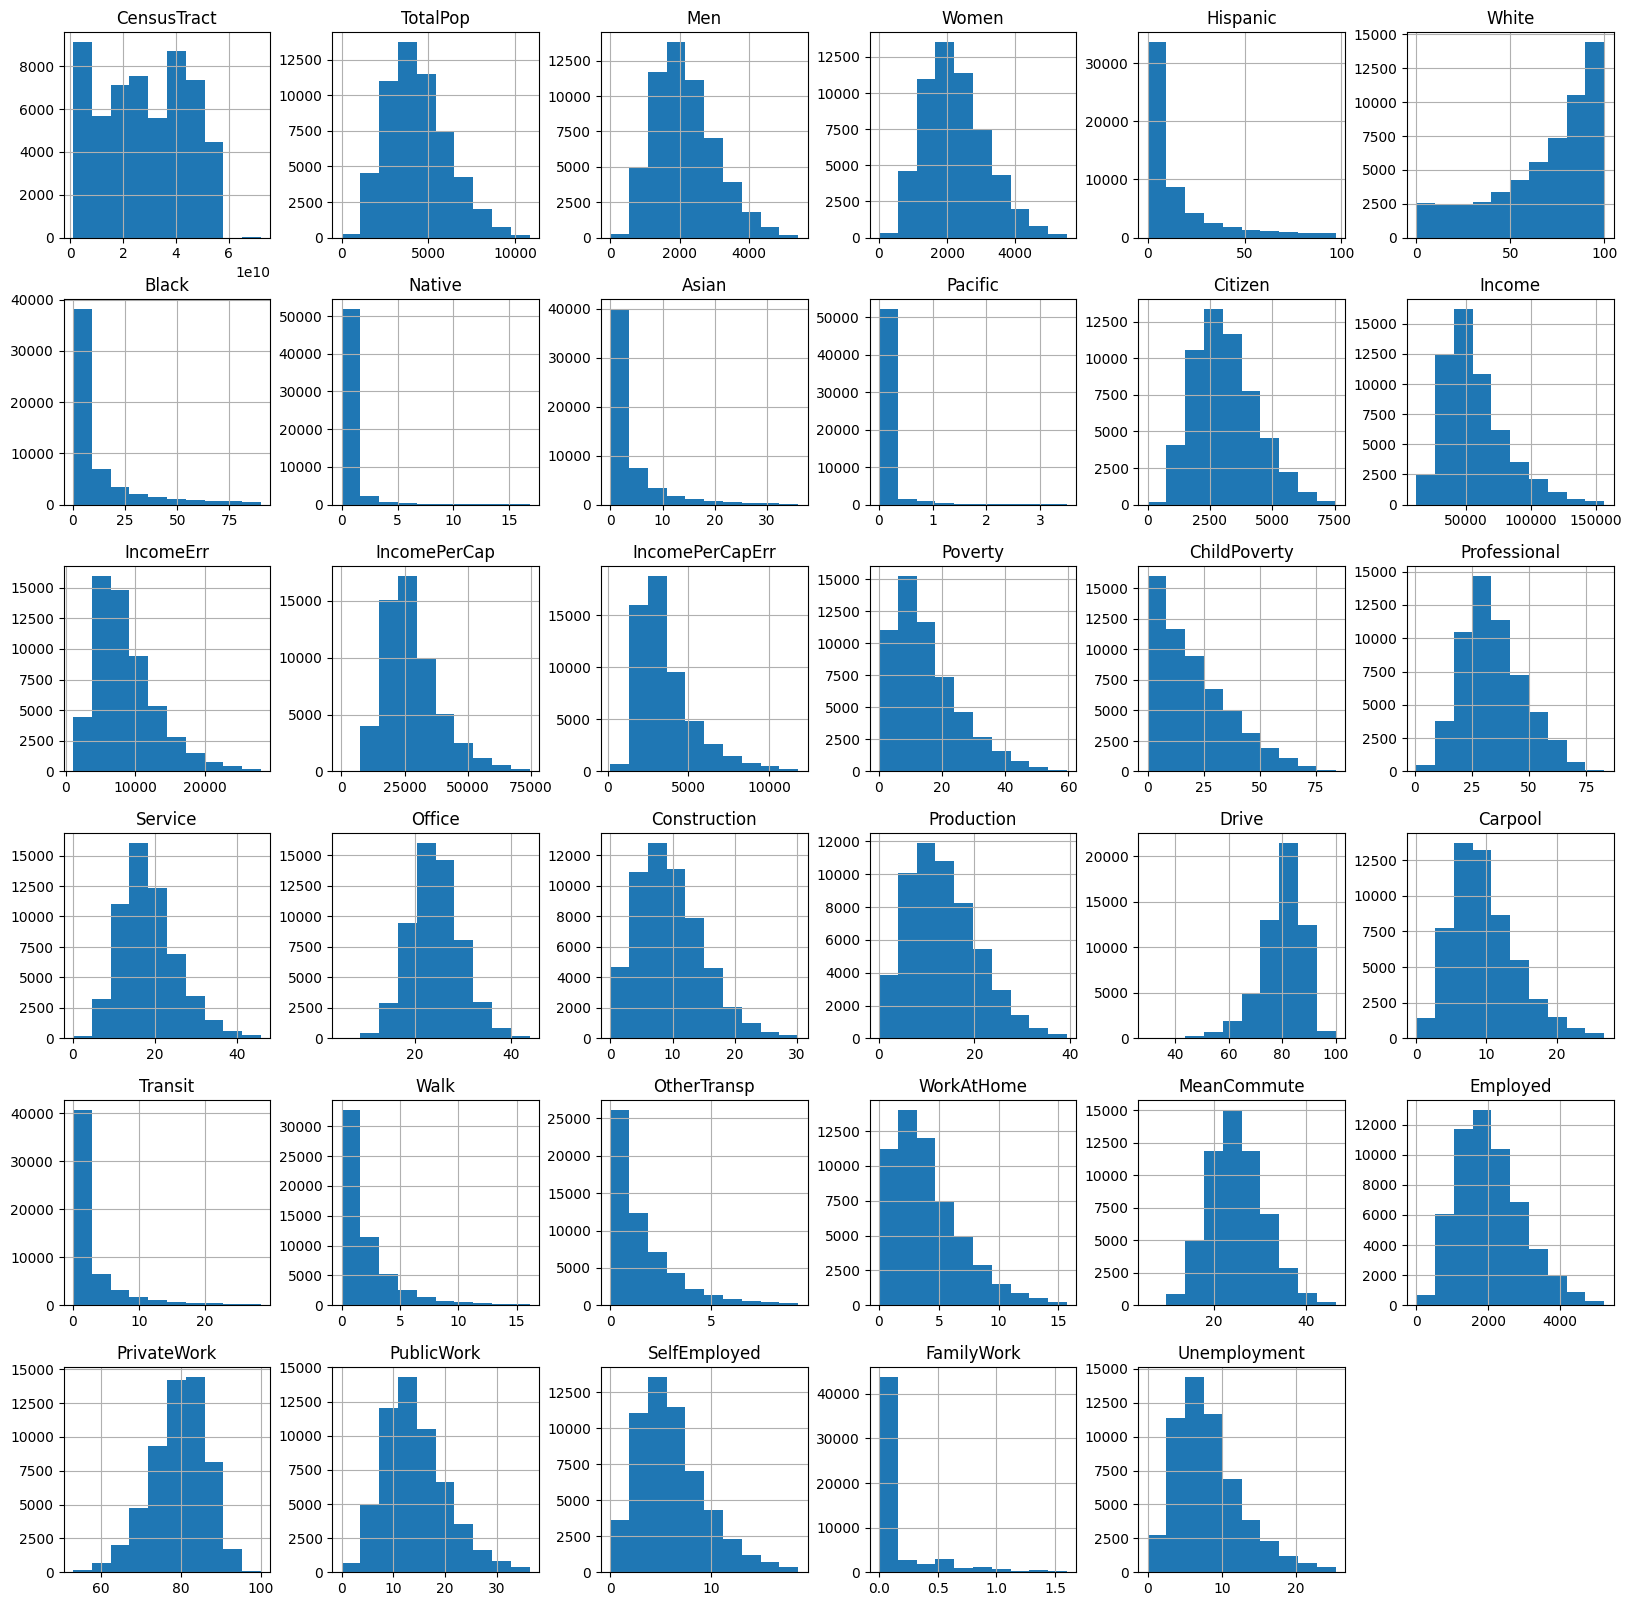

In [18]:
data.hist(figsize = (20,20))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


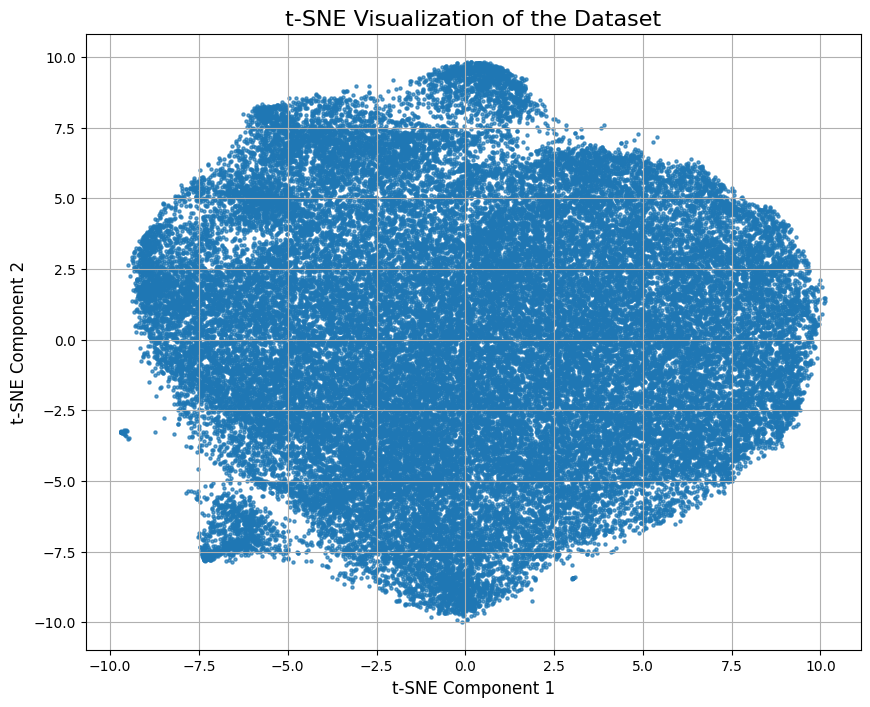

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=5, alpha=0.7)
plt.title("t-SNE Visualization of the Dataset", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.grid(True)
plt.show()


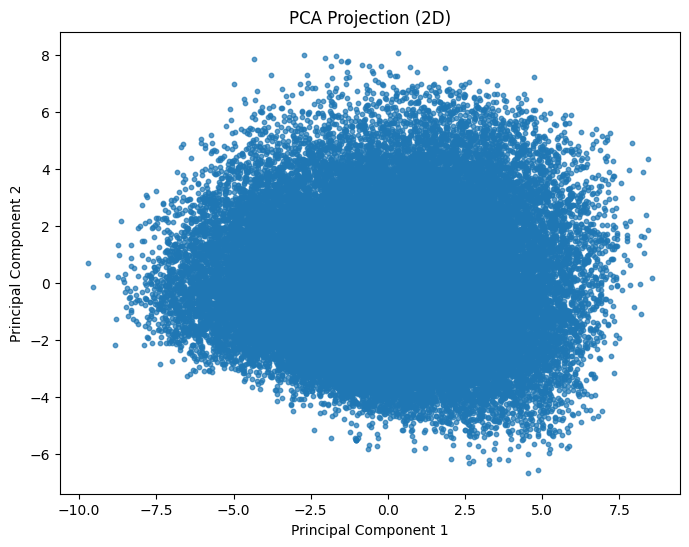

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data.select_dtypes(include=["float64", "int64"]))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


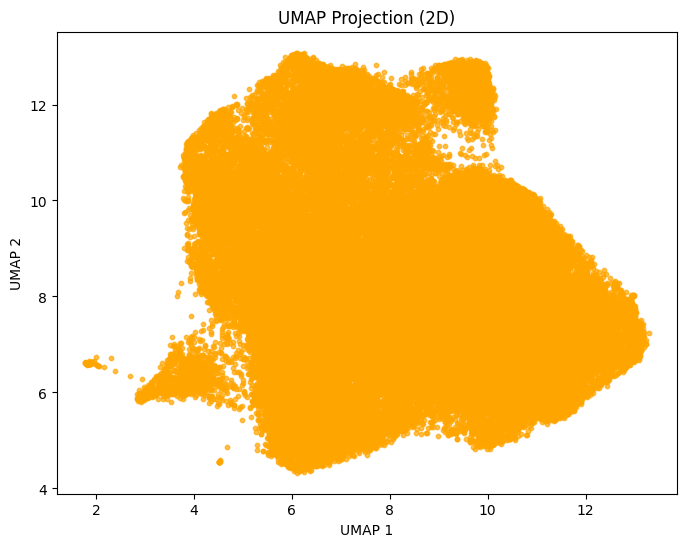

In [21]:
!pip install umap-learn
import umap
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7, color='orange')
plt.title("UMAP Projection (2D)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

UNSUPERVISED LEARNING ALGORITHMS

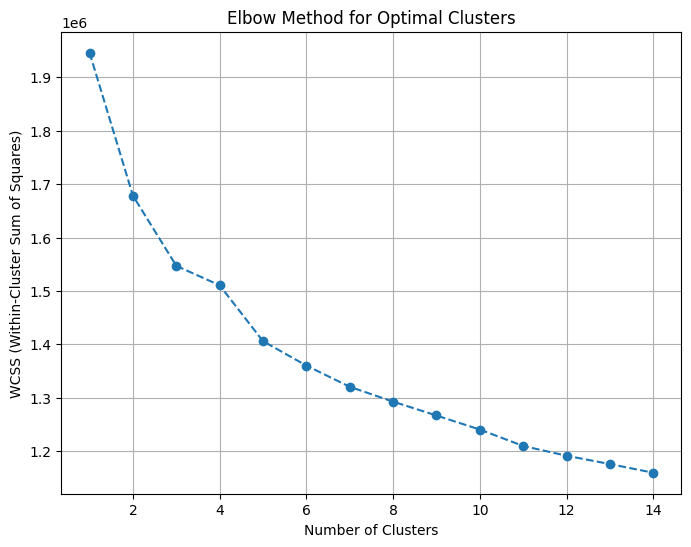

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the data
X_scaled = StandardScaler().fit_transform(data.select_dtypes(include=["float64", "int64"]))

# Define range of clusters to test
cluster_range = range(1, 15)
wcss = []  # List to store within-cluster sum of squares

# Calculate WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

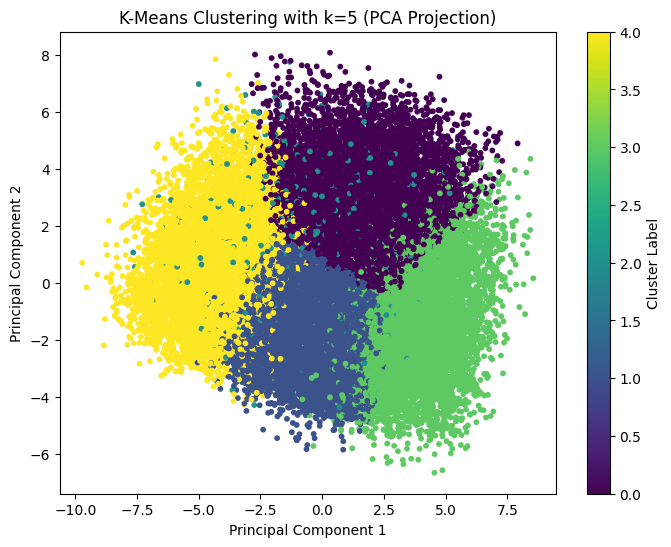

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters (k)
k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize clusters with PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title(f"K-Means Clustering with k={k} (PCA Projection)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
# Add the cluster labels to the original dataset
data['Cluster'] = clusters  # Assign clusters from K-Means

# Analyze the mean of each feature for each cluster
# Include 'Cluster' in the columns to group by
cluster_summary = data[numerical_columns.union(['Cluster'])].groupby('Cluster').mean() # Changed this line to include the 'Cluster' column

# Display the summary
print("Cluster Summary:")
print(cluster_summary)

# If you want a more readable format (e.g., Jupyter Notebook), use:
import pandas as pd
from IPython.display import display
display(cluster_summary)

Cluster Summary:
            Asian      Black    Carpool   CensusTract  ChildPoverty  \
Cluster                                                               
0        3.340631   9.049292   9.173529  2.920799e+10     15.538844   
1        1.345090   6.358263   9.353420  3.059885e+10     19.665759   
2        8.444905   9.232822  11.796337  2.379101e+10     22.800842   
3        7.123430   5.689161   7.128886  2.664621e+10      6.703814   
4        3.148797  27.217436  13.088143  2.541963e+10     41.226413   

             Citizen  Construction      Drive     Employed  FamilyWork  ...  \
Cluster                                                                 ...   
0        4695.260537      9.402699  82.893597  3126.356430    0.120169  ...   
1        2520.165211     11.283457  82.518751  1512.779618    0.162475  ...   
2        3183.610460      9.596539  76.671749  2251.859333    0.112398  ...   
3        3056.678803      5.265221  79.081971  2147.582824    0.126422  ...   
4        24

Asian      Black    Carpool   CensusTract  ChildPoverty  \
Cluster                                                               
0        3.340631   9.049292   9.173529  2.920799e+10     15.538844   
1        1.345090   6.358263   9.353420  3.059885e+10     19.665759   
2        8.444905   9.232822  11.796337  2.379101e+10     22.800842   
3        7.123430   5.689161   7.128886  2.664621e+10      6.703814   
4        3.148797  27.217436  13.088143  2.541963e+10     41.226413   

             Citizen  Construction      Drive     Employed  FamilyWork  ...  \
Cluster                                                                 ...   
0        4695.260537      9.402699  82.893597  3126.356430    0.120169  ...   
1        2520.165211     11.283457  82.518751  1512.779618    0.162475  ...   
2        3183.610460      9.596539  76.671749  2251.859333    0.112398  ...   
3        3056.678803      5.265221  79.081971  2147.582824    0.126422  ...   
4        2476.144226     11.015699  73.518074  1652.083126    0.092493  ...   

         PublicWork  SelfEmployed    Service     TotalPop   Transit  \
Cluster                                                               
0         14.830446      5.469708  17.172732  6533.861728  1.549702   
1         14.843065      6.517611  18.149771  3320.441416  0.964613   
2         14.347076      5.832975  21.463848  4913.808837  3.771308   
3         14.553104      6.622105  12.569029  4178.187234  4.203863   
4         12.086671      5.318599  25.931782  4026.607133  5.522433   

         Unemployment      Walk      White        Women  WorkAtHome  
Cluster                                                              
0            7.248225  1.375021  71.273088  3323.513959    3.741111  
1            7.691946  2.112696  82.018690  1682.250000    3.724555  
2            9.519155  2.001728  49.323805  2477.662759    3.730695  
3            5.652733  1.668353  75.030600  2139.914860    6.406309  
4           12.928964  3.002051  32.587227  2051.579762    2.610613  

[5 rows x 35 columns]

IDENTIFYING CROSS VALIDATION STRATEGIES

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example: Features (X) and labels (y)
X = X_scaled  # Scaled features
y = data['Cluster']  # Cluster labels as target

# Define Stratified k-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Example loop for training and validation
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    # Use .iloc[] to select rows based on integer positions in the Series
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train a model (example: Random Forest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Validate the model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Fold Accuracy: {accuracy:.2f}")

Fold Accuracy: 0.93
Fold Accuracy: 0.94
Fold Accuracy: 0.94
Fold Accuracy: 0.94
Fold Accuracy: 0.94


SIMPLE ML MODEL

Validation MSE: 1.9017269528314413
Validation R-squared: 0.14532966680256565


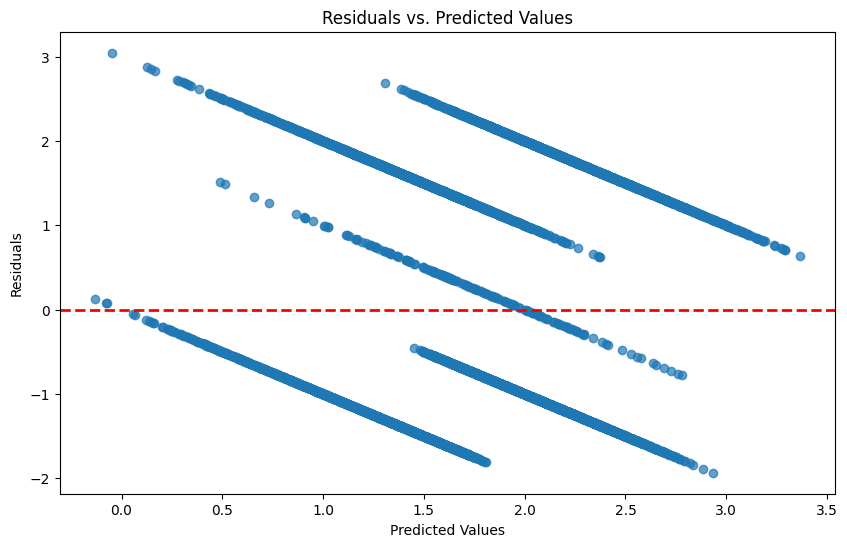

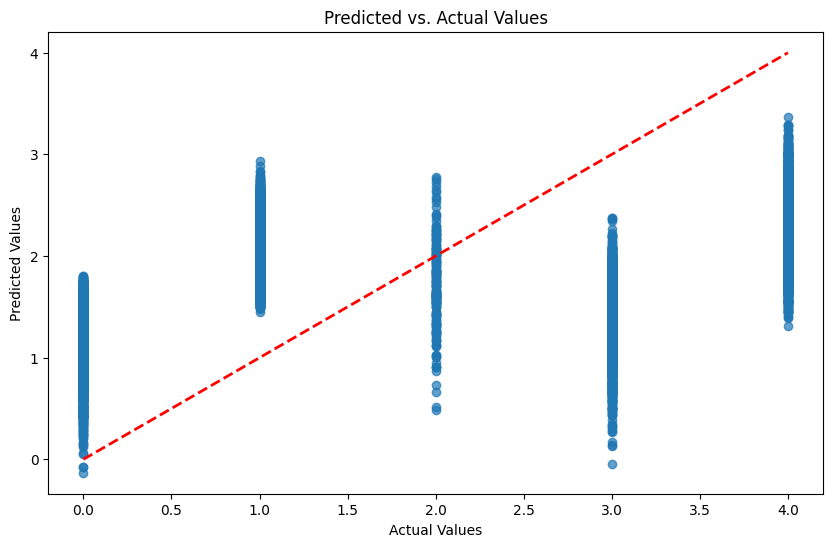

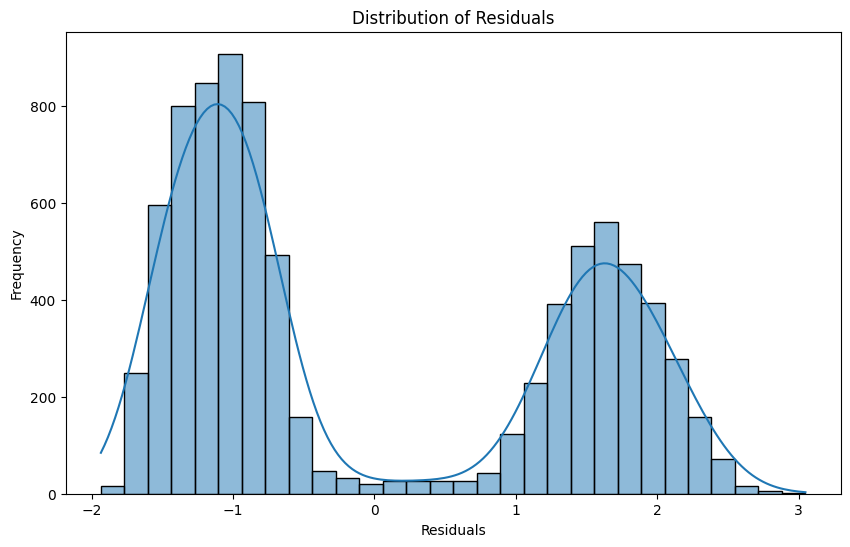

In [27]:
from sklearn.model_selection import train_test_split  # Add this line to import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R-squared: {r2_val}")

# Make predictions on the test set (X_test)
y_test_pred = model.predict(X_test)  # Predict on X_test, not X_val or other data

residuals = y_test - y_test_pred

# Plot 1: Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Plot 2: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Plot 3: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Best Alpha: 100
Best Cross-Validation R-squared: 0.12939270009926523
Validation MSE: 1.9017407292000539
Validation R-squared: 0.14532347545446767


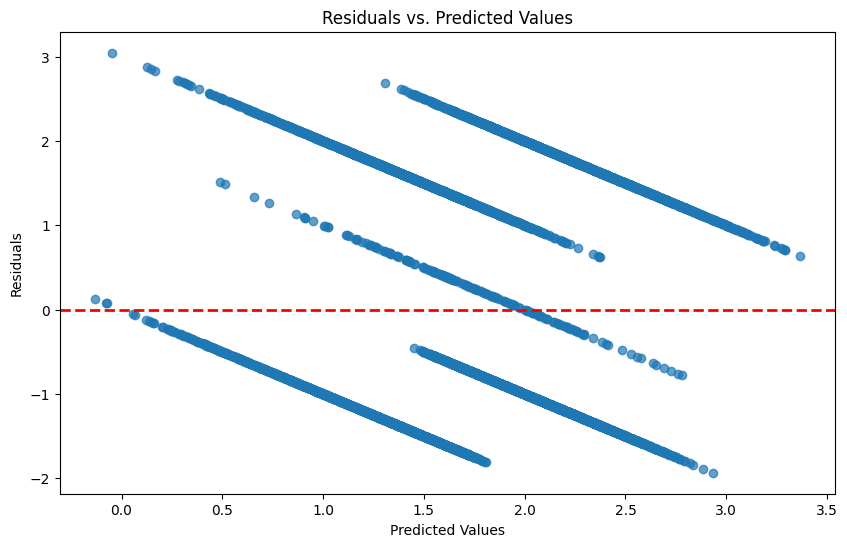

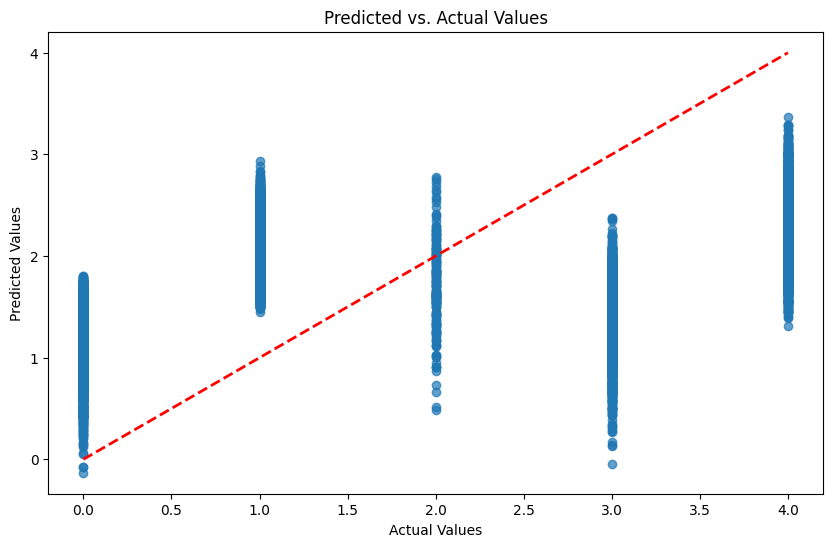

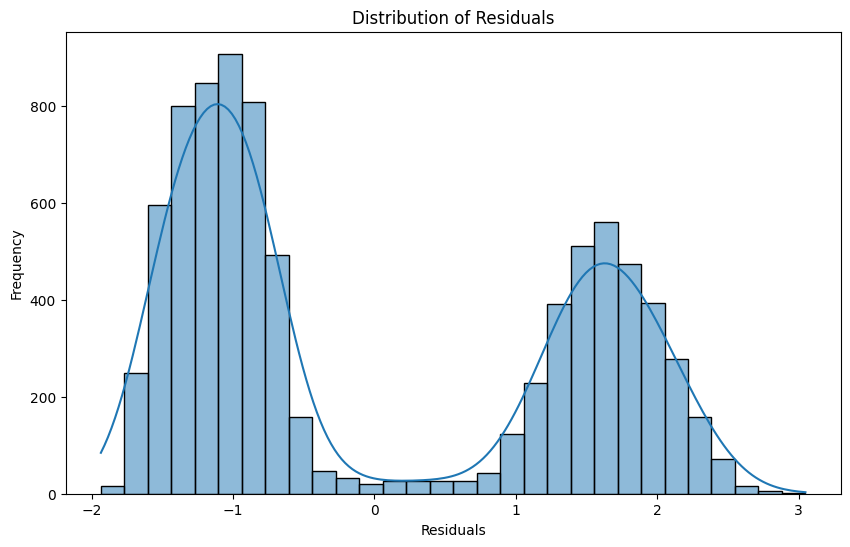

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding performance
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Train the final model with the best hyperparameter
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = final_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Print the results
print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation R-squared: {best_score}")
print(f"Validation MSE: {mse_val}")
print(f"Validation R-squared: {r2_val}")
residuals = y_test - y_test_pred

# Plot 1: Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Plot 2: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Plot 3: Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [29]:
import pandas as pd

# Assuming X is a NumPy array and you have column names
X_df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Identify categorical columns (adjust based on your knowledge of the dataset)
categorical_columns = X_df.select_dtypes(include=['object']).columns

# Apply frequency encoding for categorical variables
X_encoded = X_df.copy()
for col in categorical_columns:
    freq_encoding = X_df[col].value_counts().to_dict()
    X_encoded[col] = X_df[col].map(freq_encoding)

# Convert the DataFrame back to a NumPy array if required
X_encoded = X_encoded.values


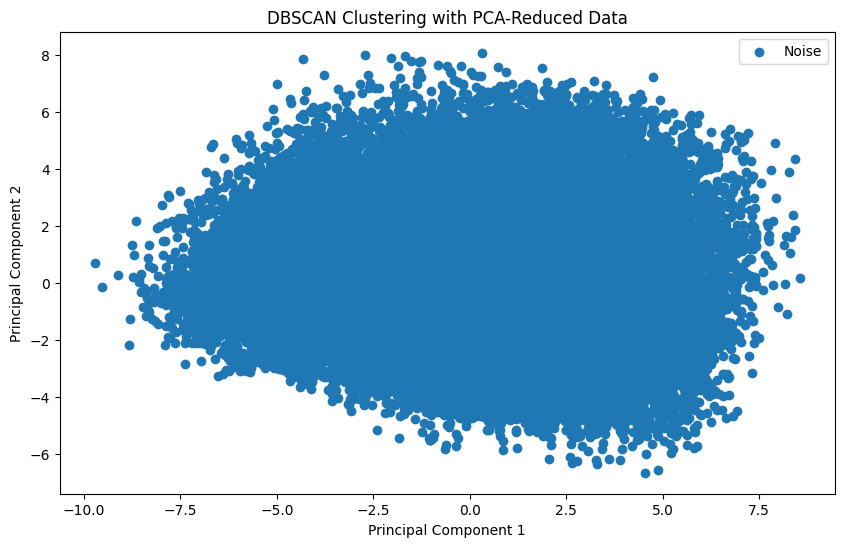

In [30]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Tune eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_encoded)

# Plot clustering results
plt.figure(figsize=(10, 6))
for label in set(dbscan_labels):
    plt.scatter(
        X_pca[dbscan_labels == label, 0],
        X_pca[dbscan_labels == label, 1],
        label=f"Cluster {label}" if label != -1 else "Noise"
    )
plt.title("DBSCAN Clustering with PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


EXPERIMENTS

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import numpy as np # import numpy for using .arange()
import pandas as pd # import pandas for converting to dataframe

# Assuming X_train was originally a pandas DataFrame and was converted to a NumPy array
# If X_train_original is not available, you might need to reconstruct it or adjust the feature selection accordingly
#X_train_df = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])]) # If original dataframe is not accessible.
X_train_df = pd.DataFrame(X_train) # Assuming X_train had no column names assigned
X_train_df.columns = [f"feature_{i}" for i in range(X_train_df.shape[1])] #Assign column names, starting with 'feature_0', 'feature_1'... etc

# Step 1: Feature Selection using Lasso
lasso_selector = Lasso(alpha=0.1)  # Regularization parameter
lasso_selector.fit(X_train, y_train)

# Get the indices of selected features using lasso_selector.coef_
selected_feature_indices = np.where(lasso_selector.coef_ != 0)[0]

# Get the column names corresponding to the selected feature indices
selected_features = X_train_df.columns[selected_feature_indices]

# Step 2: Train Lasso Regression on Selected Features
# Use selected_feature_indices to select columns from X_train and X_val
X_train_selected = X_train[:, selected_feature_indices]
X_val_selected = X_val[:, selected_feature_indices]

# ... (rest of your code remains the same)

# Hyperparameter tuning for Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search_lasso.fit(X_train_selected, y_train)

# Evaluate the best model
best_lasso = grid_search_lasso.best_estimator_
y_val_pred = best_lasso.predict(X_val_selected)
lasso_mse = mean_squared_error(y_val, y_val_pred)
lasso_r2 = r2_score(y_val, y_val_pred)

print(f"Lasso Regression - Selected Features: {len(selected_features)}")
print(f"Validation MSE: {lasso_mse}")
print(f"Validation R2: {lasso_r2}")



Lasso Regression - Selected Features: 2
Validation MSE: 1.902094631591598
Validation R2: 0.1451644253476948


In [32]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define LightGBM regressor
lgbm = lgb.LGBMRegressor(random_state=42)

# Define hyperparameter grid
param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Perform Grid Search
grid_search_lgb = GridSearchCV(lgbm, param_grid_lgb, scoring='r2', cv=5)
grid_search_lgb.fit(X_train, y_train)

# Best model and predictions
best_lgbm = grid_search_lgb.best_estimator_
y_val_pred_lgbm = best_lgbm.predict(X_val)

# Evaluate performance
lgbm_mse = mean_squared_error(y_val, y_val_pred_lgbm)
lgbm_r2 = r2_score(y_val, y_val_pred_lgbm)

print("LightGBM:")
print(f"Best Parameters: {grid_search_lgb.best_params_}")
print(f"Validation MSE: {lgbm_mse}")
print(f"Validation R²: {lgbm_r2}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 31138, number of used features: 2
[LightGBM] [Info] Start training from score 1.762059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 